<a href="https://colab.research.google.com/github/nevenka-arh/python-042023/blob/main/Ukol4_NevenkaAtanasoska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from pydotplus import graph_from_dot_data

Naimportovat tabulku

In [ ]:
data = pandas.read_csv("domaci_ukoly_ukol_04_data.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [138]:
import numpy

y = data["y"]

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()

In [139]:
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
model = DecisionTreeClassifier()
params = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10,11,12], "min_samples_split": [10, 20, 30, 40, 50, 60]}

clf = GridSearchCV(model, {"max_depth": [3, 4, 5,6,7,8,9,10,11,12], "min_samples_split": [10,20,30,40,50,60]}, scoring="accuracy")
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4, 'min_samples_split': 10}
0.8811025541745673


**Původně jsem nejprve vložila strom, ale byl příliš velký, takže jsem se rozhodla nejprve vypočítat hloubku stromu a minimální počet rozdělených vzorků. **

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

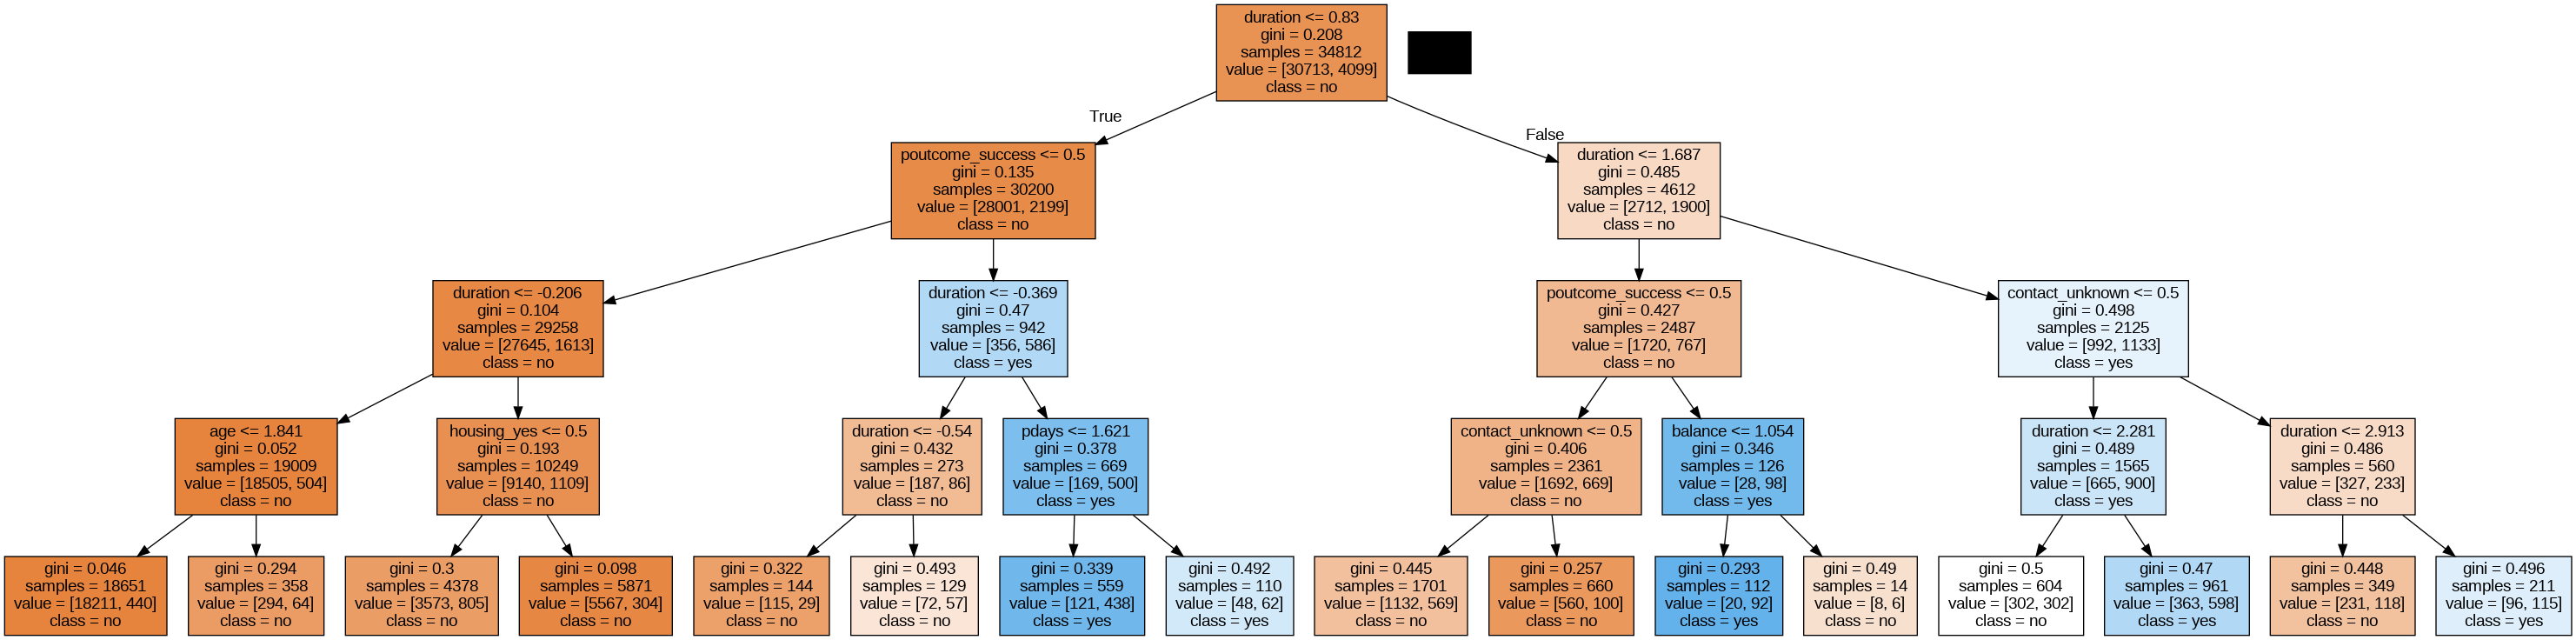

In [ ]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["no", "yes"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

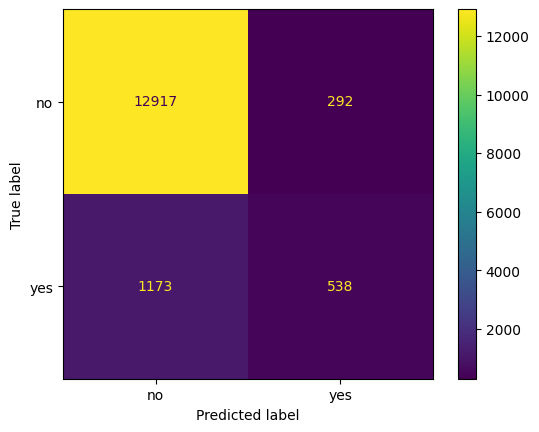

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
accuracy_score(y_test, y_pred)

0.9018096514745308

*Hodnota metriky accuracy je přibližně 90 %.*

In [ ]:
precision_score(y_test, y_pred, pos_label='yes')

0.6481927710843374

*Hodnota metriky, která je důležitá pro vedení marketingového oddělení, je přibližně 65 %*

In [ ]:
recall_score(y_test, y_pred, pos_label='yes')

0.31443600233781416

KNN a SVM

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:

X = data.drop(['y'], axis=1)
y = data['y']
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_cols = ["age", "balance", "duration", "pdays", "previous"]

encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols]).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])

# Concatenate encoded categorical and scaled numeric variables
X_processed = pd.concat([pd.DataFrame(X_encoded), pd.DataFrame(X_scaled)], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

**KNN**

In [ ]:
parameters = {'n_neighbors': [3, 7, 11, 15, 19, 23]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_neighbors = grid_search.best_params_['n_neighbors']
best_neighbors

23

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_neighbors)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn



0.900371971448678

In [136]:
precision_knn = precision_score(y_test, y_pred_knn, pos_label='yes')
precision_knn

0.6470588235294118

**SVM**

In [133]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm


0.8927314768271841

In [134]:
precision_svm=precision_score(y_test, y_pred_svm, pos_label='yes')
precision_svm

0.6337579617834395

Of all the algorithms used, Support Vector Machines has the highest accuracy (0.675)